In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#hit=np.load("/tmp/argon/opticks/GEOM/B1/exampleB1/ALL0/A000/hit.npy")
photon=np.load("/tmp/argon/opticks/GEOM/B1/exampleB1/ALL0/A000/photon.npy")
#record=np.load("/tmp/argon/opticks/GEOM/B1/exampleB1/ALL0/A000/record.npy")
hit=np.load("/tmp/argon/opticks/GEOM/B1/exampleB1/ALL0/A000/hit.npy")

In [3]:
print(photon[0])

[[-1.0000000e+02  4.0722893e+01 -5.9147003e+01  3.8816929e+00]
 [-8.1225979e-01  3.3077568e-01 -4.8043871e-01  0.0000000e+00]
 [-4.0217990e-01  2.7897677e-01  8.7202251e-01  1.8398244e+02]
 [ 1.8385036e-40  0.0000000e+00  0.0000000e+00  1.8216880e-43]]


In [4]:
xHit = hit[:,0,0]
yHit = hit[:,0,1]
zHit = hit[:,0,2]




In [5]:
xphoton = photon[:,0,0]
yphoton = photon[:,0,1]
zphoton = photon[:,0,2]
tphoton = photon[:,0,3]

(array([1.12094e+05, 2.74450e+04, 7.50400e+03, 2.04300e+03, 5.96000e+02,
        1.61000e+02, 3.80000e+01, 1.10000e+01, 2.00000e+00, 2.00000e+00]),
 array([3.95826995e-01, 1.28971313e+02, 2.57546783e+02, 3.86122284e+02,
        5.14697754e+02, 6.43273254e+02, 7.71848694e+02, 9.00424194e+02,
        1.02899963e+03, 1.15757520e+03, 1.28615063e+03]),
 <BarContainer object of 10 artists>)

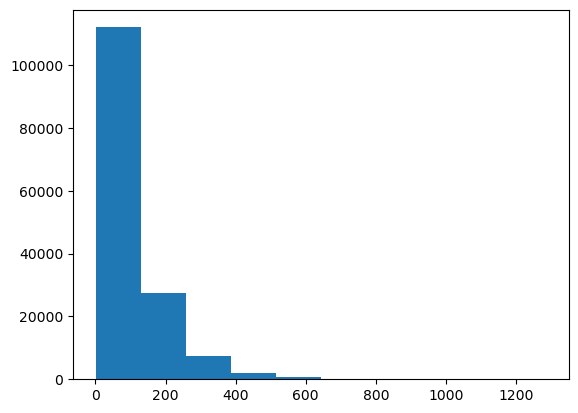

In [6]:
plt.hist(tphoton)

In [7]:
print(zphoton)
print(yphoton)
print(xphoton)


[ -59.147003 -150.00002   150.00002  ...  -60.618885  -52.12959
   39.19484 ]
[ 40.722893  23.690233  63.006187 ... -31.511702 -99.99999  -46.67631 ]
[-1.0000000e+02 -9.3152252e+01 -8.5007519e-02 ... -9.9999992e+01
 -1.2410032e+01  1.0000000e+02]


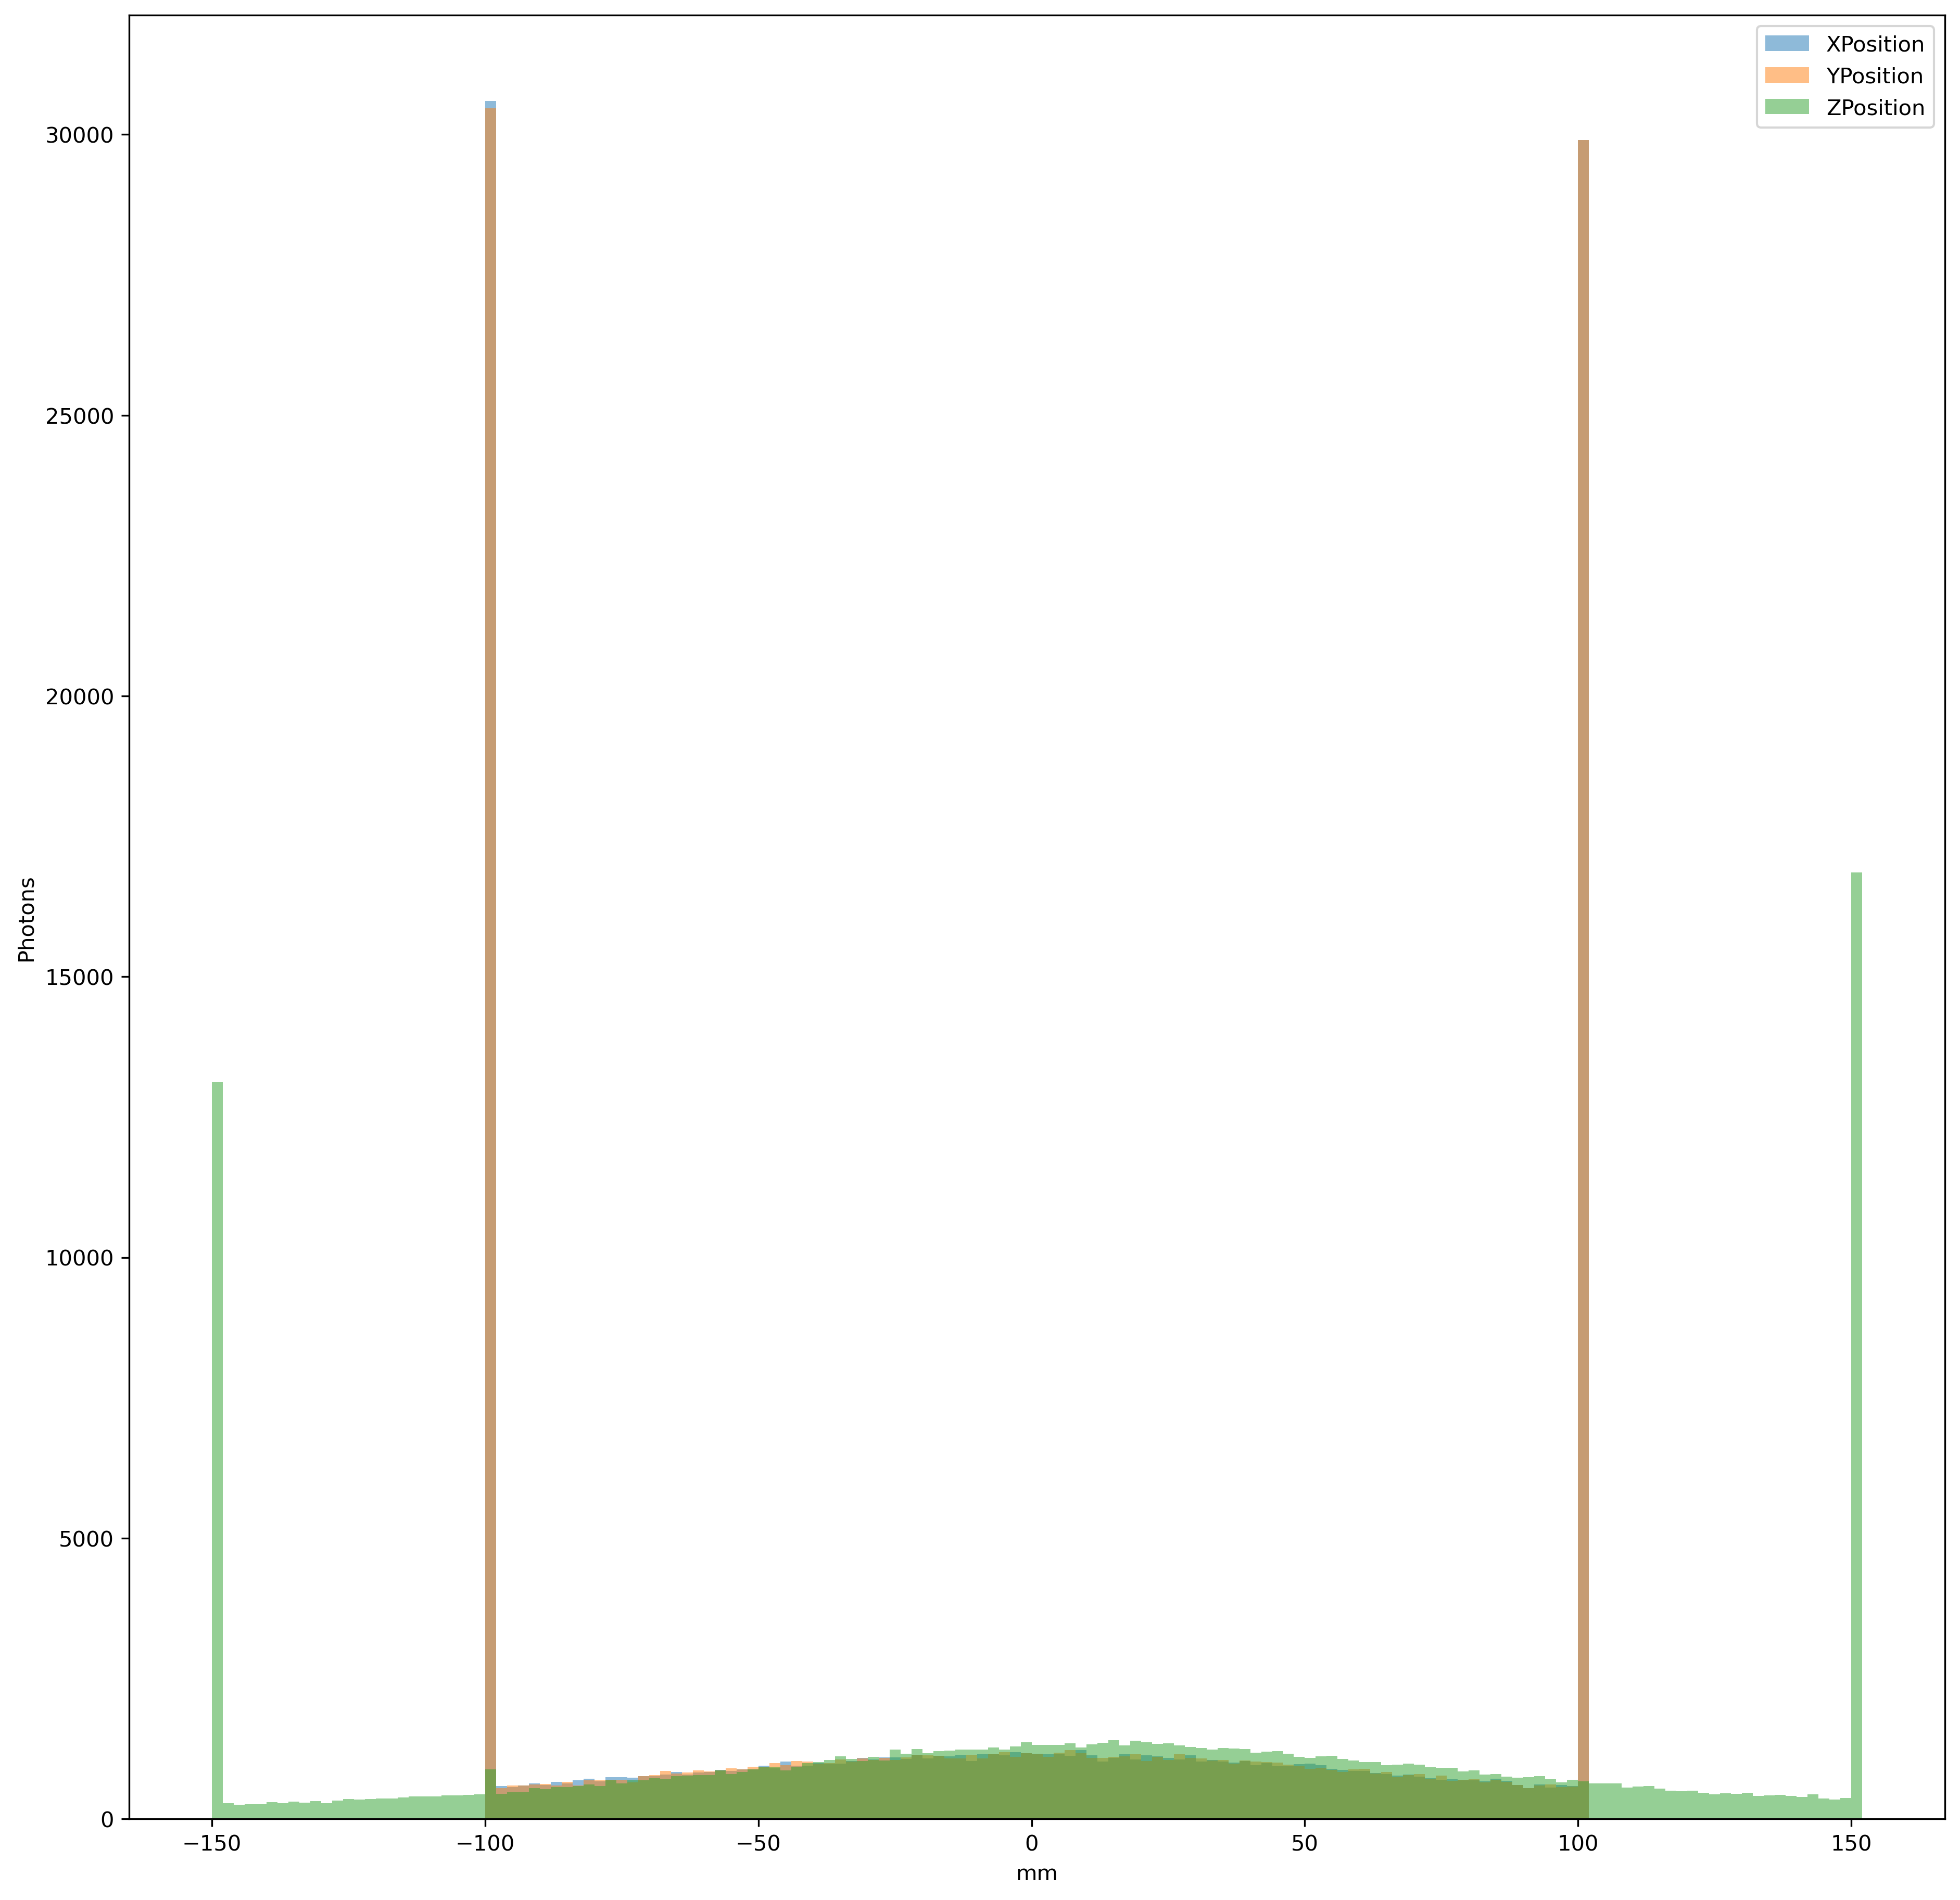

In [8]:
plt.figure(figsize=(15,15),dpi=300)
alls=np.array([])
alls=np.append(alls,xphoton)
alls=np.append(alls,yphoton)
alls=np.append(alls,zphoton)

step=2
bins=np.arange(np.min(alls),np.max(alls)+step,step)
plt.hist(xphoton,label="XPosition",bins=bins,alpha=0.5)
plt.hist(yphoton,label="YPosition",bins=bins,alpha=0.5)
plt.hist(zphoton,label="ZPosition",bins=bins,alpha=0.5)
plt.xlabel("mm")
plt.ylabel("Photons")
plt.legend()
plt.show()

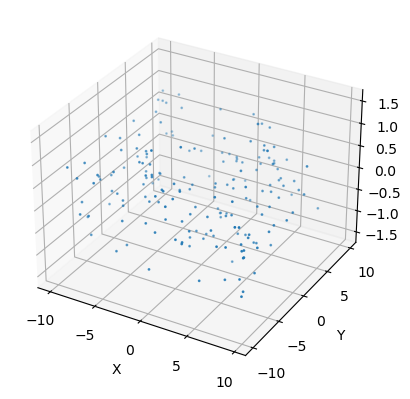

In [9]:
### Hits
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xHit,yHit,zHit,s=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

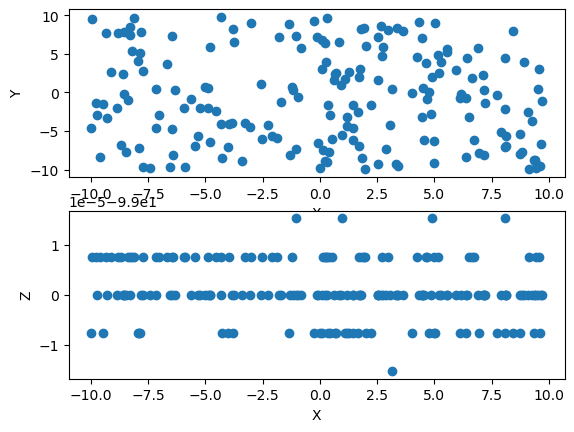

In [10]:
### Hits
## Opticks
fig,sub=plt.subplots(2)
sub[0].scatter(xHit,yHit)
sub[0].set_xlabel("X")
sub[0].set_ylabel("Y")
sub[1].scatter(xHit,zHit)
sub[1].set_xlabel("X")
sub[1].set_ylabel("Z")

plt.show()

In [11]:
## Root 

In [12]:
import uproot

In [13]:
myfile=uproot.open("/home/argon/Projects/Ilker/OpticksTest/build/Opticks_CPU.root")

In [14]:
myfile.keys()

['G4Photons;1', 'particles;1', 'Opticks;1']

In [15]:
Photons=myfile["G4Photons"]
Particles=myfile["particles"]
Opticks=myfile["Opticks"]
Photons.keys()

['Event', 'fx', 'fy', 'fz', 'ft', 'Volume', 'Process']

In [16]:
PhotonVolume = Photons["Volume"].array()
mask=PhotonVolume=="Detector_Logic"

In [17]:
print(np.count_nonzero(mask))

0


In [18]:
if(np.count_nonzero(mask)>0):
    PhotonFinalX=Photons["fx"].array()[mask]
    PhotonFinalY=Photons["fy"].array()[mask]
    PhotonFinalZ=Photons["fz"].array()[mask]
    PhotonFinalT=Photons["ft"].array()[mask]
else:
    PhotonFinalX=Photons["fx"].array()
    PhotonFinalY=Photons["fy"].array()
    PhotonFinalZ=Photons["fz"].array()
    PhotonFinalT=Photons["ft"].array()

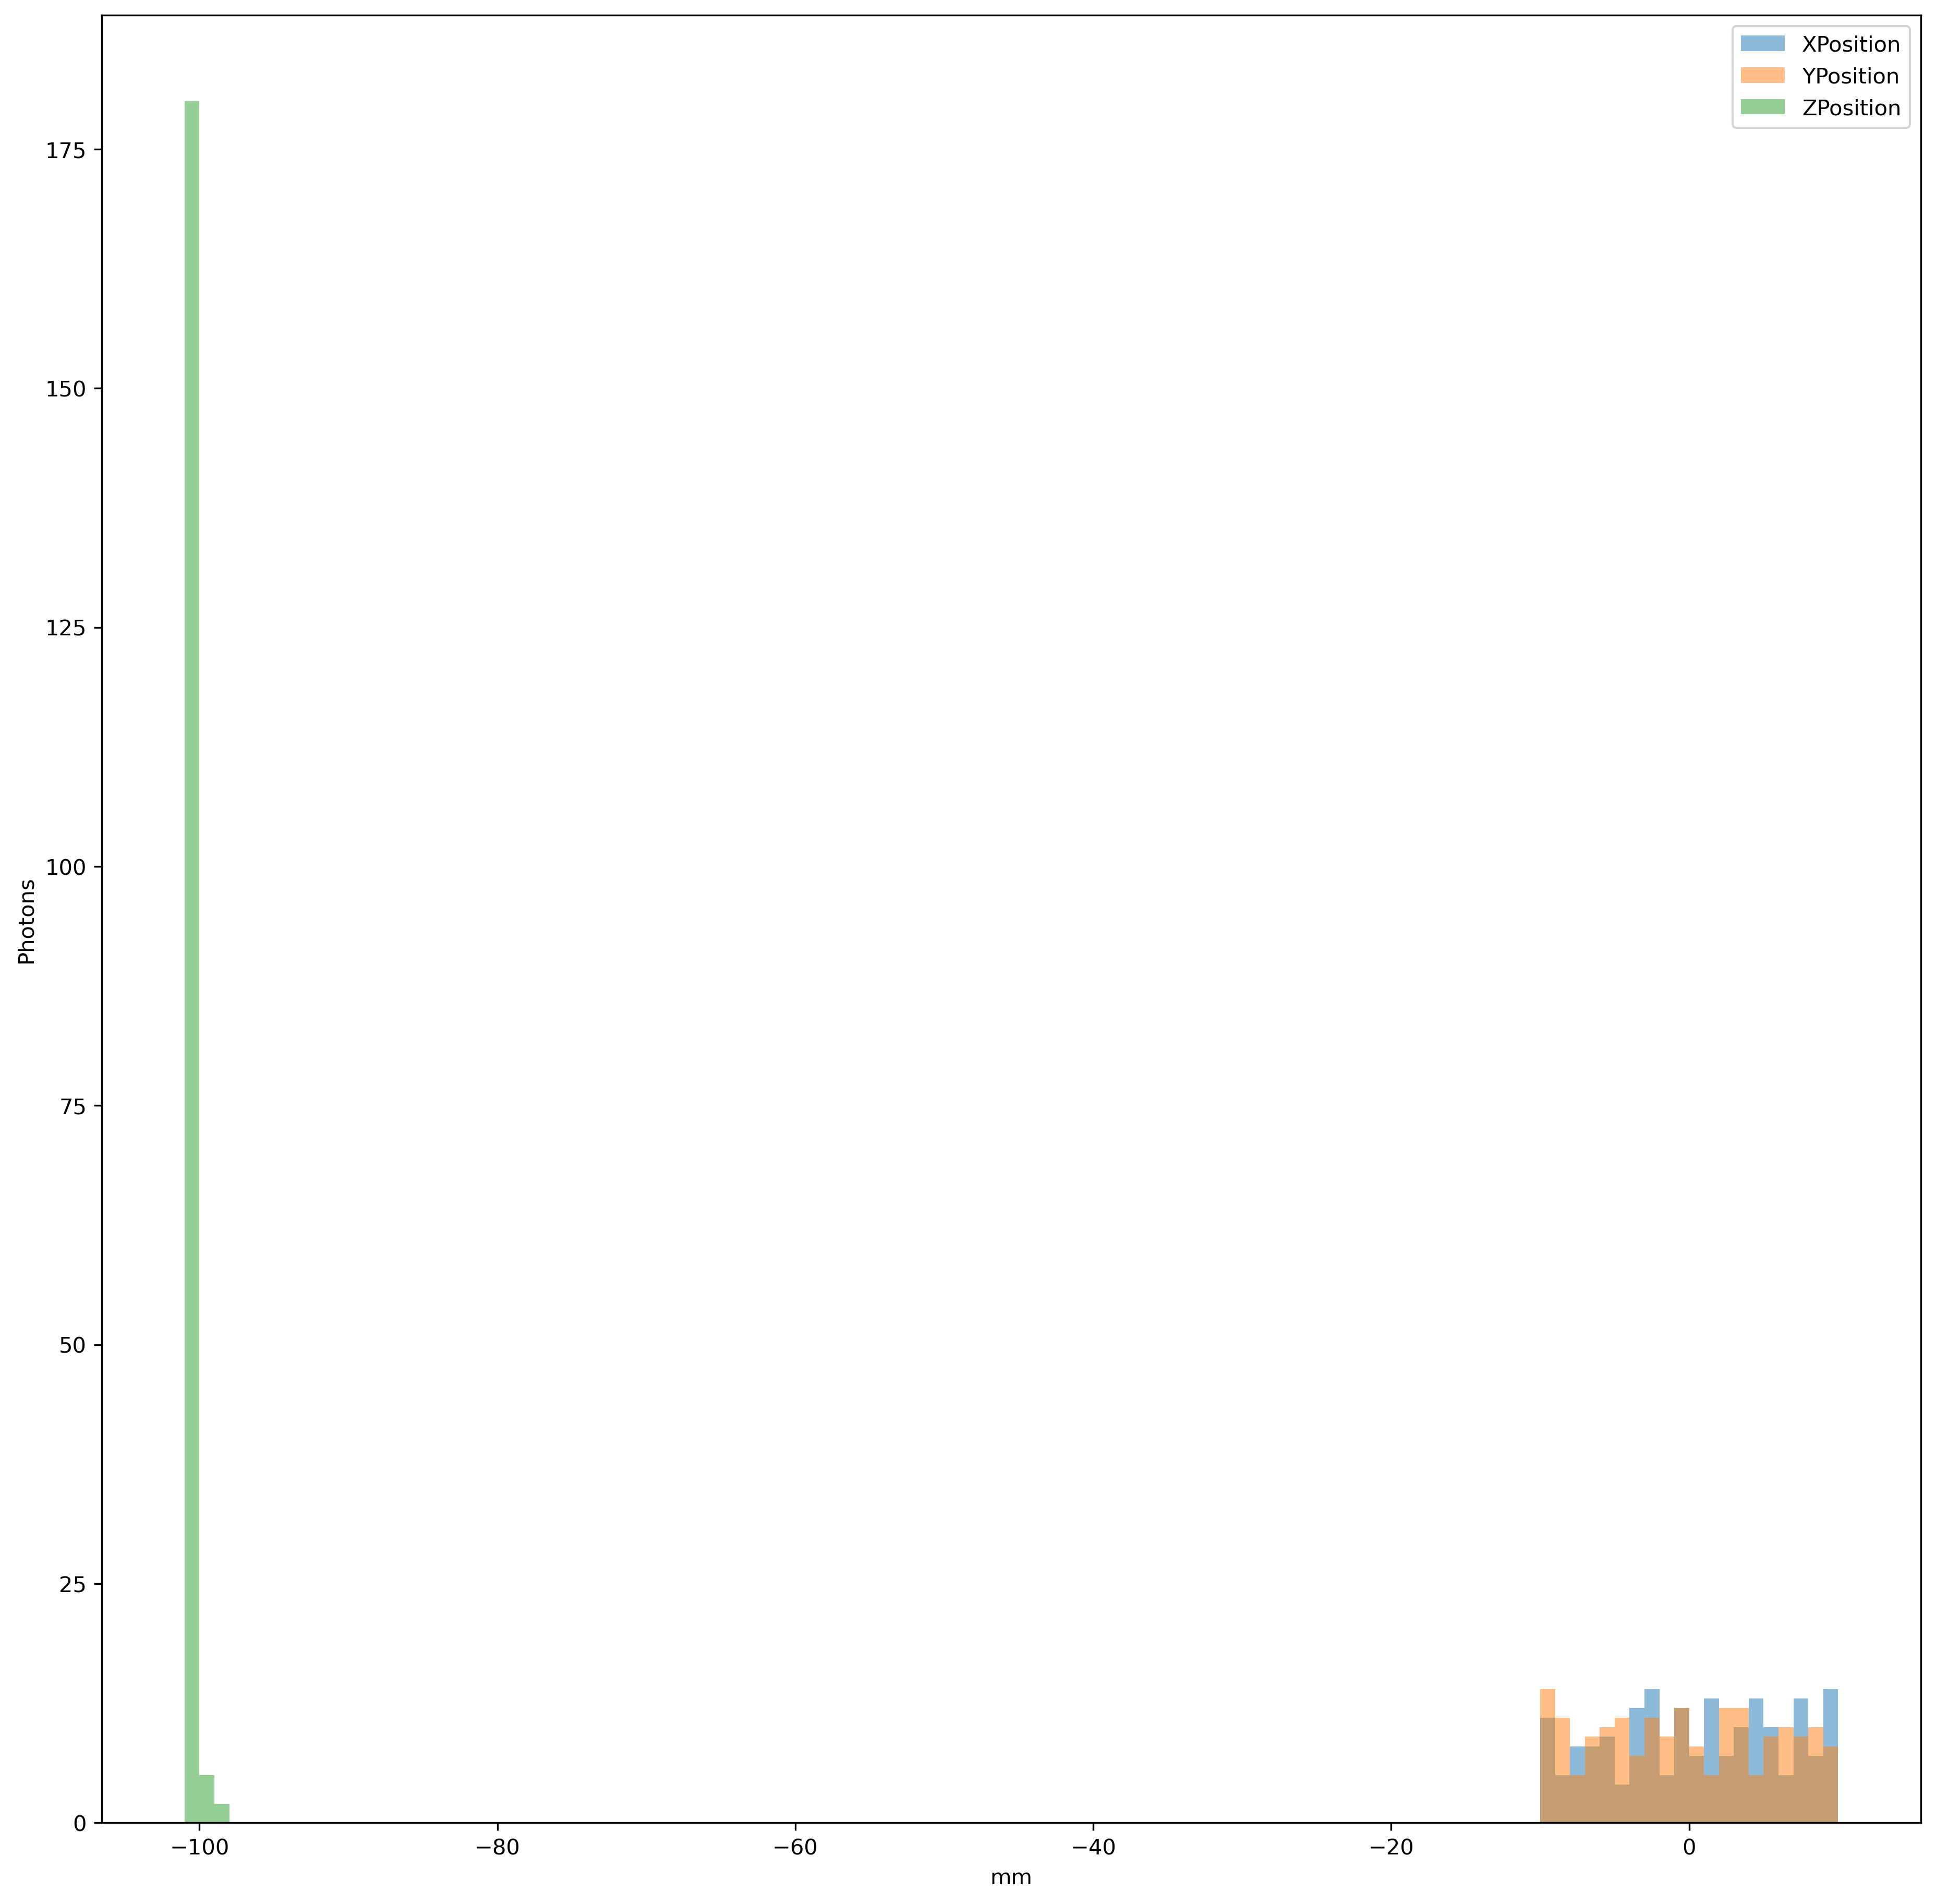

In [19]:
alls=np.array([])
alls=np.append(alls,PhotonFinalX)
alls=np.append(alls,PhotonFinalY)
alls=np.append(alls,PhotonFinalZ)

step=1
bins=np.arange(np.min(alls),np.max(alls)+step,step)
plt.figure(figsize=(15,15),dpi=300)
plt.hist(PhotonFinalX,label="XPosition",bins=bins,alpha=0.5)
plt.hist(PhotonFinalY,label="YPosition",bins=bins,alpha=0.5)
plt.hist(PhotonFinalZ,label="ZPosition",bins=bins,alpha=0.5)
plt.xlabel("mm")
plt.ylabel("Photons")
plt.legend()
plt.show()

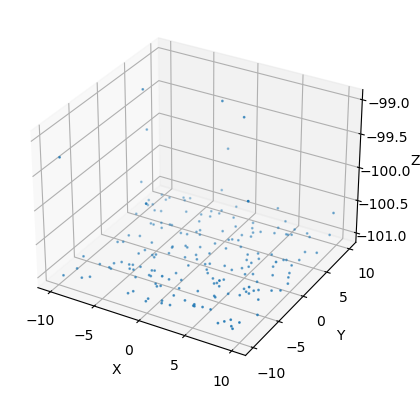

In [20]:
## Photons
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(PhotonFinalX,PhotonFinalY,PhotonFinalZ,s=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

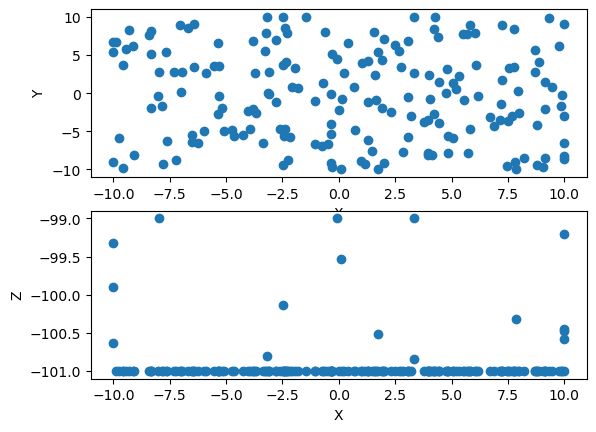

In [21]:
fig,sub=plt.subplots(2)
sub[0].scatter(PhotonFinalX,PhotonFinalY)
sub[0].set_xlabel("X")
sub[0].set_ylabel("Y")
sub[1].scatter(PhotonFinalX,PhotonFinalZ)
sub[1].set_xlabel("X")
sub[1].set_ylabel("Z")

plt.show()

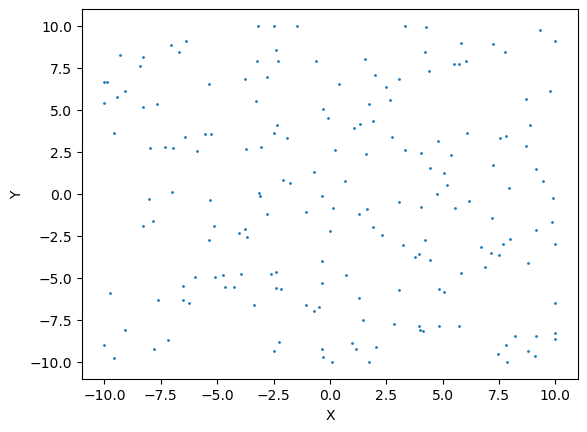

In [22]:
## Photons
fig = plt.figure()
plt.scatter(PhotonFinalX,PhotonFinalY,s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [23]:
## For  the Particle
Particles.keys()

['Event', 'ID', 'name', 'x', 'y', 'z', 't', 'Volume']

In [24]:
PVolume=Particles["Volume"].array()
PName=Particles["name"].array()

In [25]:

PNameMask=PName=="alpha"

In [26]:
Px=Particles["x"].array()[PNameMask]
Py=Particles["y"].array()[PNameMask]
Pz=Particles["z"].array()[PNameMask]

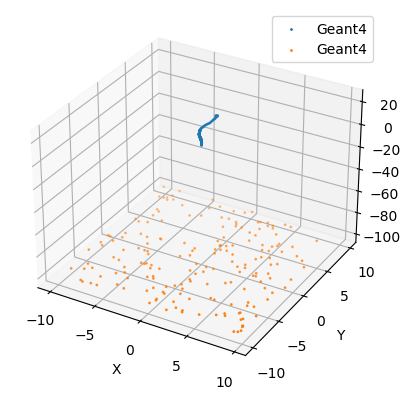

In [31]:
## Alphas
fig = plt.figure()
ax.set_title("Root Alpha")
ax = fig.add_subplot(projection='3d')
#ax.scatter3D(xphoton,yphoton,zphoton,s=1,label="opticks")
ax.scatter3D(Px,Py,Pz,s=1,label="Geant4")
ax.scatter3D(xHit,yHit,zHit,s=1,label="Optic")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

In [28]:
### Opticks

Ox=Opticks["x"].array()
Oy=Opticks["y"].array()
Oz=Opticks["z"].array()
print("Amount of Hits")
print(f"Opticks {len(Oz)}")
print(f"GEANT4 {len(PhotonFinalX)}")

Amount of Hits
Opticks 188
GEANT4 187


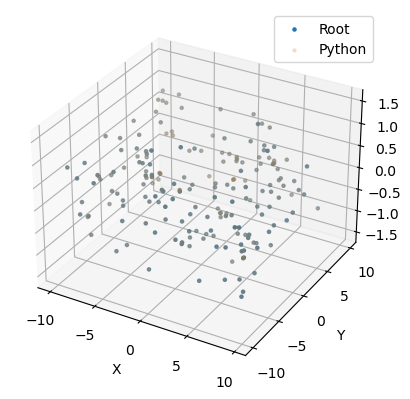

In [29]:
## Alphas
fig = plt.figure()
ax.set_title("Opticks Photon")
ax = fig.add_subplot(projection='3d')
ax.scatter3D(Ox,Oy,Oz,s=5,label="Root")
ax.scatter3D(xHit,yHit,zHit,s=5,label="Python",alpha=0.2)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()